In [1]:
##install needed libraries
!pip install matplotlib
!pip install pandas


In [46]:
##import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#calling/reading dataset
df = pd.read_csv("combinedscores.csv")
# head() method returns the first 5 rows 
print(df.head())


  Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0          0  female         NaN   bachelor's degree      standard     none   
1          1  female     group C        some college      standard      NaN   
2          2  female     group B     master's degree      standard     none   
3          3    male     group A  associate's degree  free/reduced     none   
4          4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  Writing

In [128]:
#general information about data
df.describe()


,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [129]:
#datatype konse h /range 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61283 non-null  object 
 1   Gender               61283 non-null  object 
 2   EthnicGroup          59443 non-null  object 
 3   ParentEduc           59438 non-null  object 
 4   LunchType            61283 non-null  object 
 5   TestPrep             59453 non-null  object 
 6   ParentMaritalStatus  60093 non-null  object 
 7   PracticeSport        60652 non-null  object 
 8   IsFirstChild         60379 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  float64
 13  ReadingScore         30641 non-null  float64
 14  WritingScore         30641 non-null  float64
dtypes: float64(4), object(11)
memory usa

In [130]:
#sum of null values
df.isnull().sum()


Unnamed: 0                 1
Gender                     1
EthnicGroup             1841
ParentEduc              1846
LunchType                  1
TestPrep                1831
ParentMaritalStatus     1191
PracticeSport            632
IsFirstChild             905
NrSiblings             32215
TransportMeans         33777
WklyStudyHours         31598
MathScore              30643
ReadingScore           30643
WritingScore           30643
dtype: int64

In [131]:
## drop unamed col.
df = df.drop("Unnamed: 0",axis =1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5       71.0          71.0          74.0  


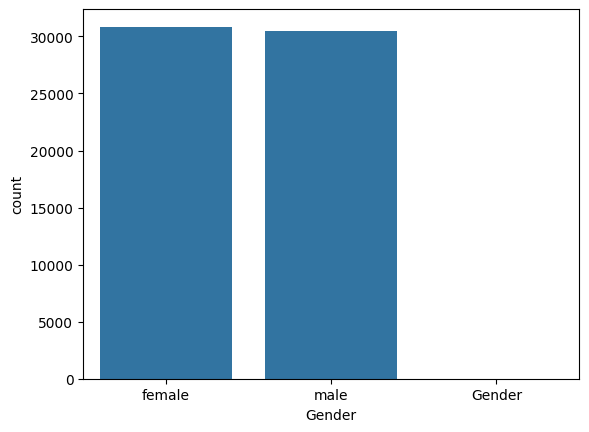

In [132]:
#plotting gender count
sns.countplot(data=df,x="Gender")
plt.show()

In [133]:
#seeing gender col
print(df["Gender"])

0        female
1        female
2        female
3          male
4          male
          ...  
61279      male
61280      male
61281      male
61282    female
61283       NaN
Name: Gender, Length: 61284, dtype: object


In [134]:
#dropping nan values
df_c = df.dropna(subset=['Gender'])
df_c["Gender"]

0        female
1        female
2        female
3          male
4          male
          ...  
61278      male
61279      male
61280      male
61281      male
61282    female
Name: Gender, Length: 61283, dtype: object

In [135]:
##false value in the col
print(df_c['Gender'].value_counts())

Gender
female    30848
male      30434
Gender        1
Name: count, dtype: int64


In [136]:
#dropping the false value
df_c.drop(df_c[df_c['Gender'] == 'Gender'].index, inplace=True)
print(df_c['Gender'].value_counts())

Gender
female    30848
male      30434
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_23120\2239563099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.drop(df_c[df_c['Gender'] == 'Gender'].index, inplace=True)


In [137]:
#checking for null values in gender
df_c.isnull().sum()

Gender                     0
EthnicGroup             1840
ParentEduc              1845
LunchType                  0
TestPrep                1830
ParentMaritalStatus     1190
PracticeSport            631
IsFirstChild             904
NrSiblings             32213
TransportMeans         33775
WklyStudyHours         31596
MathScore              30641
ReadingScore           30641
WritingScore           30641
dtype: int64

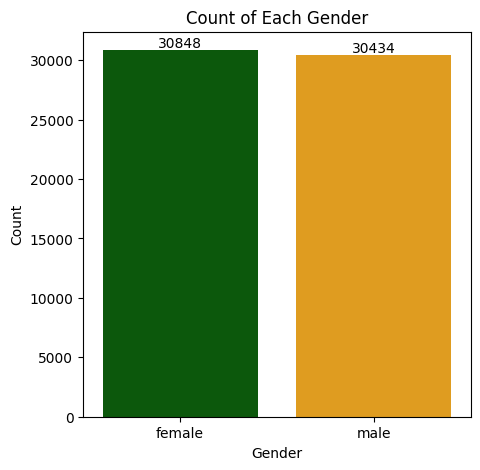

In [138]:
#plotting the count
#size of the plot
plt.figure(figsize =(5,5))
colors = ['darkgreen', 'orange']
ax= sns.countplot(data=df_c,x="Gender", hue='Gender',palette=colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#here we analyzed the count of female is more in the the data



In [139]:
##impact of parents educations on children score
gb=df_c.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore": "mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


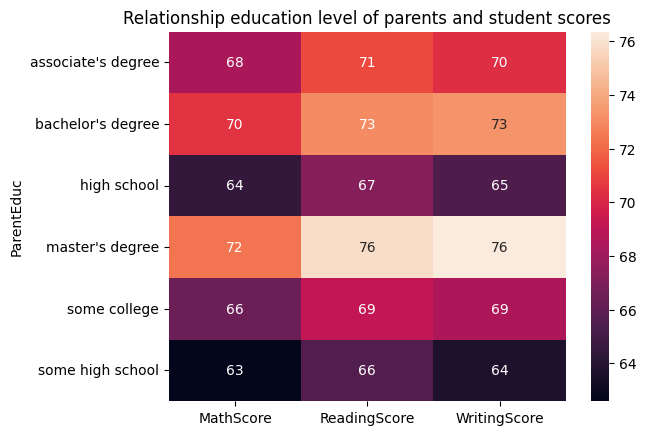

In [149]:
#plotting (annot agr value show krni h toh)
sns.heatmap(gb , annot =True)
plt.title("Relationship education level of parents and student scores")
plt.show()

#from the above chart we can conclude parent education impacts the child's score

In [141]:
##impact of parents marital status on children score but it includes nulls
gb1=df_c.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore": "mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
0                          NaN           NaN           NaN
10                         NaN           NaN           NaN
100                        NaN           NaN           NaN
11                         NaN           NaN           NaN
12                         NaN           NaN           NaN
...                        ...           ...           ...
99                         NaN           NaN           NaN
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452

[98 rows x 3 columns]


In [142]:
#checking null values in specific col
print(df_c[['ParentMaritalStatus', 'MathScore', 'ReadingScore', 'WritingScore']].isna().sum())


ParentMaritalStatus     1190
MathScore              30641
ReadingScore           30641
WritingScore           30641
dtype: int64


In [144]:
#droping null values
df_c_cleaned = df_c.dropna(subset=['ParentMaritalStatus', 'MathScore', 'ReadingScore', 'WritingScore'])
print(df_c_cleaned)

       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly    

In [145]:
##impact of parents educations on children score
gb1 = df_c_cleaned.groupby("ParentMaritalStatus").agg({
    "MathScore": "mean",
    "ReadingScore": "mean",
    "WritingScore": "mean"
})
print(gb1)


                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


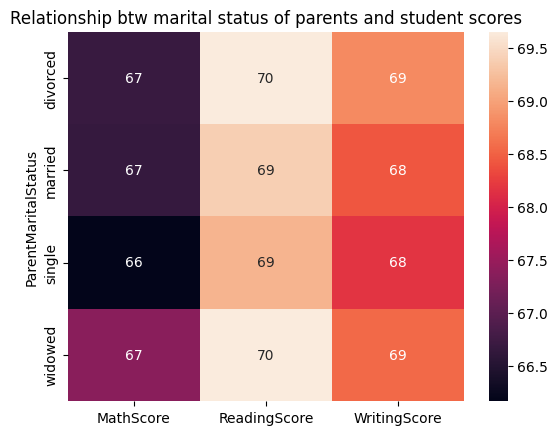

In [148]:
##plotting
sns.heatmap(gb1 , annot =True)
plt.title("Relationship btw marital status of parents and student scores")
plt.show()

#marital status doesnt effect much on child's score


In [159]:
##relationship of studnets scores with test prep
df_c_clean = df_c.dropna(subset=['TestPrep','WklyStudyHours','PracticeSport'])
print(df_c_clean)

       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
5      female     group B  associate's degree      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly    

In [160]:
gb2 = df_c_cleaned.groupby("TestPrep").agg({
    "MathScore": "mean",
    "ReadingScore": "mean",
    "WritingScore": "mean"
})
print(gb2)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.531329     73.728625     74.710499
none       64.969570     67.076185     65.119791


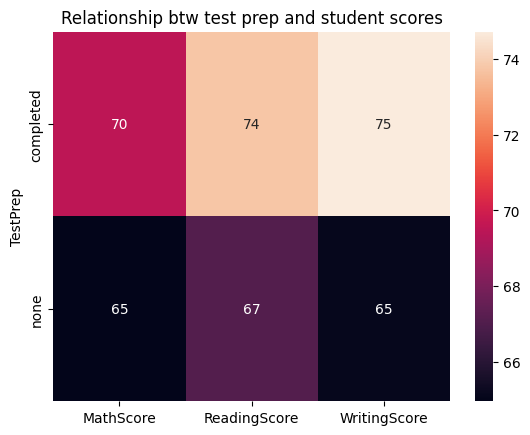

In [161]:
sns.heatmap(gb2 , annot =True)
plt.title("Relationship btw test prep and student scores")
plt.show()

#from here we can conclude children who completed test prep tend to score more in the exams


In [162]:
#impact of practice sports 
gb3 = df_c_cleaned.groupby("PracticeSport").agg({
    "MathScore": "mean",
    "ReadingScore": "mean",
    "WritingScore": "mean"
})
print(gb3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.196985     68.337318     66.525728
regularly      67.822154     69.943894     69.608411
sometimes      66.276698     69.251643     68.085022


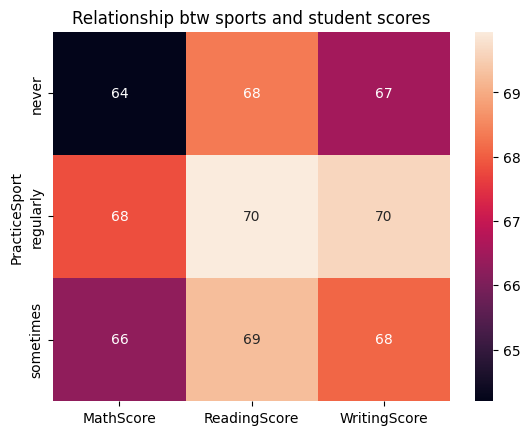

In [163]:
sns.heatmap(gb3 , annot =True)
plt.title("Relationship btw sports and student scores")
plt.show()

##from this we can conclude sports practice doesn't affect students scores


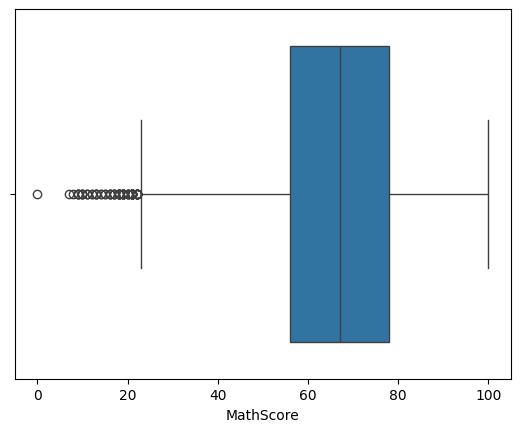

In [164]:
#seeing outliers
sns.boxplot(data=df,x="MathScore")
plt.show()

In [184]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E' 'EthnicGroup']


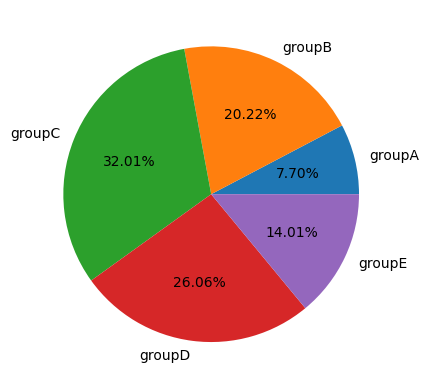

In [189]:
#distribution of ethnic groups
groupA= df.loc[(df["EthnicGroup"] =="group A")].count()
groupB= df.loc[(df["EthnicGroup"] =="group B")].count()
groupC= df.loc[(df["EthnicGroup"] =="group C")].count()
groupD= df.loc[(df["EthnicGroup"] =="group D")].count()
groupE= df.loc[(df["EthnicGroup"] =="group E")].count()

l=["groupA","groupB","groupC","groupD","groupE"]
mlist= [ groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist, labels=l,autopct="%1.2f%%")
plt.show()


[Text(0, 0, '19028'),
 Text(0, 0, '12018'),
 Text(0, 0, '4578'),
 Text(0, 0, '15489'),
 Text(0, 0, '8329'),
 Text(0, 0, '1')]

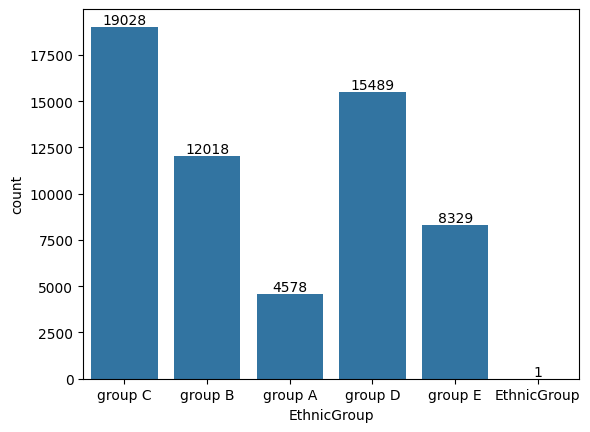

In [190]:
ax=sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])

In [191]:
#dropping the false value
df_c.drop(df_c[df_c['EthnicGroup'] == 'EthnicGroup'].index, inplace=True)
print(df_c['Gender'].value_counts())

Gender
female    30848
male      30434
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_23120\3783347318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.drop(df_c[df_c['EthnicGroup'] == 'EthnicGroup'].index, inplace=True)


[Text(0, 0, '19028'),
 Text(0, 0, '12018'),
 Text(0, 0, '4578'),
 Text(0, 0, '15489'),
 Text(0, 0, '8329')]

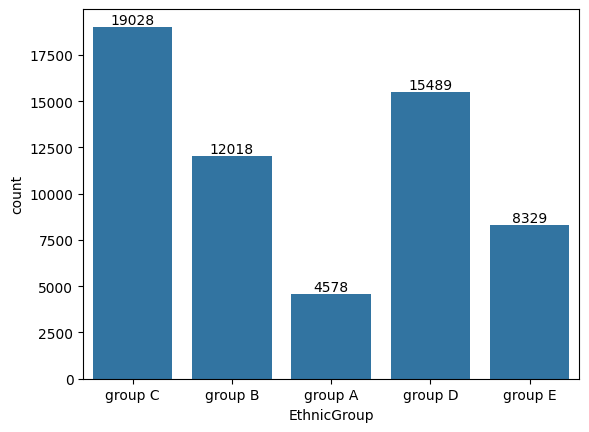

In [192]:
ax=sns.countplot(data=df_c,x="EthnicGroup")
ax.bar_label(ax.containers[0])